### Hilbert DDPM for 1D toy example

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

from util import get_V_and_A,get_x_0_for_1D_DDPM,gp_sampler,np2torch,torch2np,power_test
from ddpm import get_ddpm_constants,plot_ddpm_constants,ddpm_train_wrapper,ddpm_trainer
from model import DenoisingDenseUNetClass
from datasets import get_quadratic_function,get_melbourne_dataset

np.set_printoptions(precision=2)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('xtick',labelsize=5); plt.rc('ytick',labelsize=5)
print ("Ready.")

Ready.


### Diffusion constants

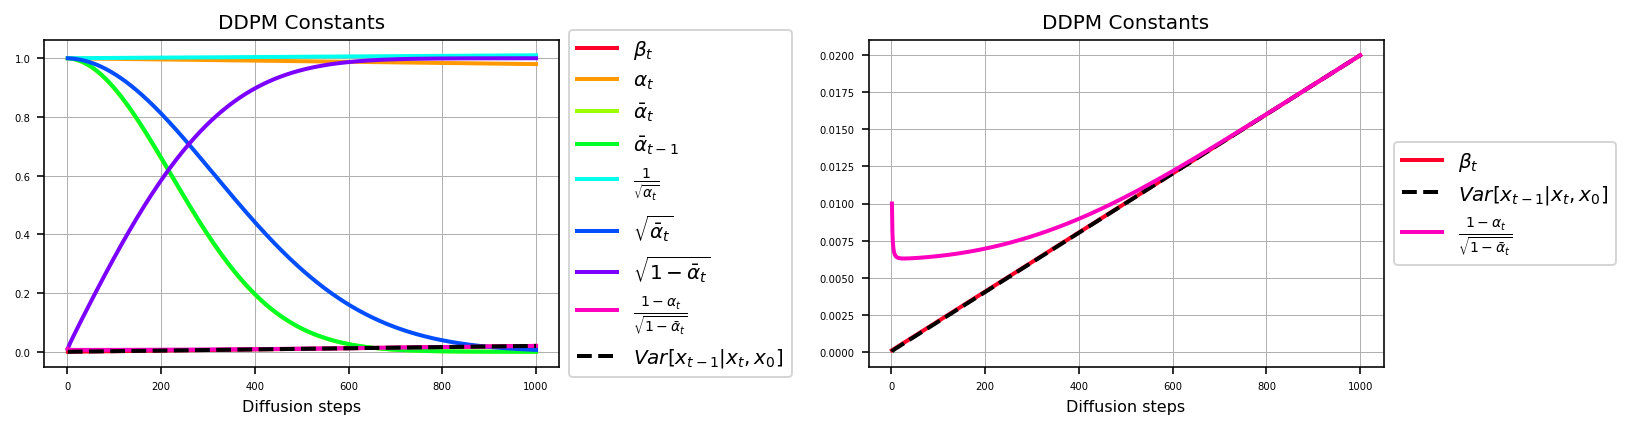

In [2]:
# Smaller `beta_end` tends to show better performances
dc = get_ddpm_constants(beta_start=1e-4,beta_end=2e-2,diffusion_step=1000)
plot_ddpm_constants(dc,figsize=(12,3))

### Commmon hyper-parameters

In [3]:
BATCH_SIZE,D,L = 256,1,24
base_lr,MAX_ITER = 1e-4,50000
actv = nn.ReLU() # nn.GELU(), nn.ReLU()
l1_w,l2_w,huber_w,smt_l1_w = 1.0,1.0,0.0,0.0
device = 'cuda:2' # cpu / mps / cuda
print(device)
print ("Ready.")

cuda:2
Ready.


### Training data

In [4]:
times = np.linspace(start=0., stop=23.0, num=L).reshape((-1,1)) # [L x 1]
# x_0,V,A = get_x_0_for_1D_DDPM(times,D=1,M=10,USE_SINGLE_TRAJECTORY=False,device='cpu')
# x_0,V,A = get_x_0_for_quadratic_DDPM(times,D=1,M=256,USE_SINGLE_TRAJECTORY=False,device='cpu')
V,A = get_V_and_A(times)[:2]
print ("Ready.")

Ready.


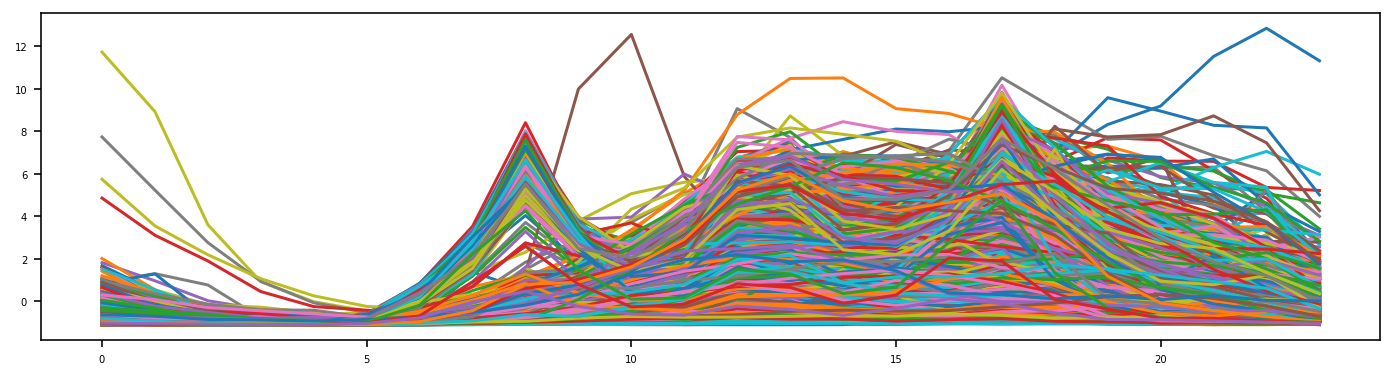

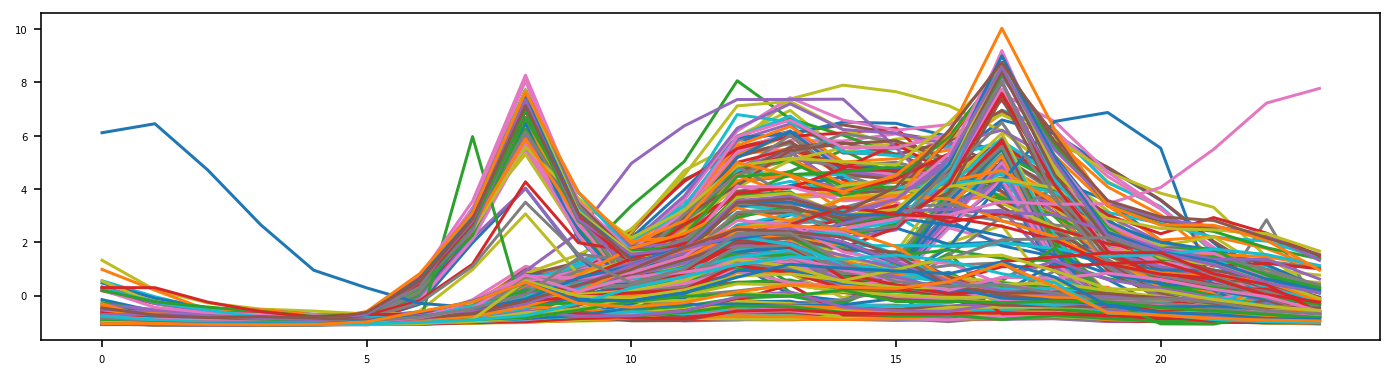

In [5]:
x_train, y_train, _x_val, _y_val = get_melbourne_dataset(p_train=0.8)

num_test_val = _x_val.shape[0] // 2

x_val = _x_val[:num_test_val]
y_val = _y_val[:num_test_val]

x_test = _x_val[num_test_val:]
y_test = _y_val[num_test_val:]

y_train_np = y_train.numpy()
y_val_np = y_val.numpy()

# times = np.linspace(-10, 10, 100)
plt.figure(figsize=(12,3))

for i in range(x_train.shape[0]):
    plt.plot(times,y_train_np[i, 0],label='x_train')
# plt.plot(times,x_val[0,:],label='x_val[0]')
    # plt.legend()
plt.show()

plt.figure(figsize=(12,3))

for i in range(x_val.shape[0]):
    plt.plot(times,y_val_np[i, 0],label='x_val')
    # plt.legend()
plt.show()


In [6]:
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(x_val, y_val)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [7]:
for x_train, y_train in train_loader:
    print(x_train.shape, y_train.shape)
    break

torch.Size([256, 24, 1]) torch.Size([256, 1, 24])


### Diffusion DDPM 

SE kernel length parameter =  1.0
[0/50000][0.00%] train loss:[3.074]
  [l1]:[1.102]
  [l2]:[2.065]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[0/50000][0.00%] valid loss:[1.800]
  [l1]:[0.799]
  [l2]:[1.001]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


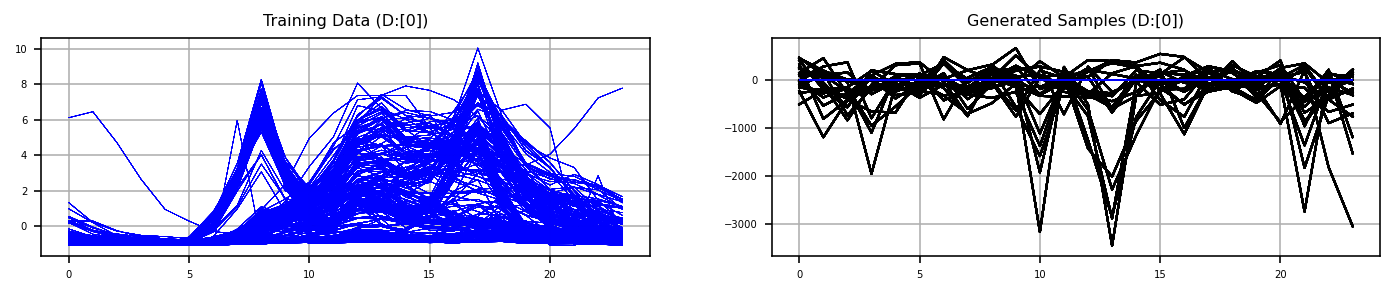

[2500/50000][5.00%] train loss:[0.369]
  [l1]:[0.245]
  [l2]:[0.140]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[2500/50000][5.00%] valid loss:[0.363]
  [l1]:[0.219]
  [l2]:[0.144]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] train loss:[0.378]
  [l1]:[0.252]
  [l2]:[0.155]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] valid loss:[0.378]
  [l1]:[0.214]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


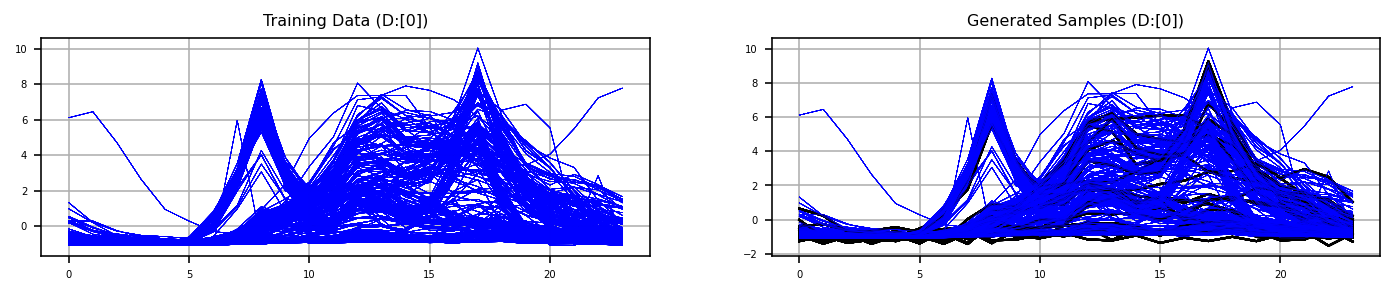

[7500/50000][15.00%] train loss:[0.360]
  [l1]:[0.265]
  [l2]:[0.175]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[7500/50000][15.00%] valid loss:[0.358]
  [l1]:[0.214]
  [l2]:[0.144]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] train loss:[0.358]
  [l1]:[0.268]
  [l2]:[0.173]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] valid loss:[28.941]
  [l1]:[0.426]
  [l2]:[28.515]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


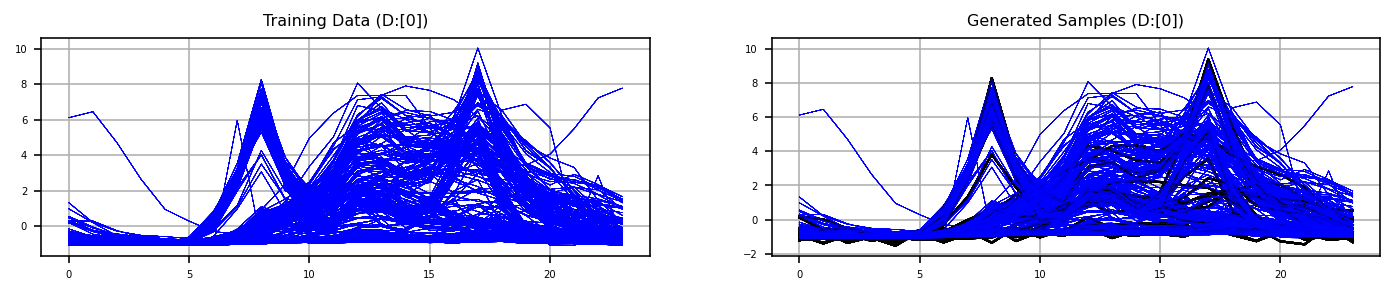

[12500/50000][25.00%] train loss:[0.361]
  [l1]:[0.276]
  [l2]:[0.157]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[12500/50000][25.00%] valid loss:[0.339]
  [l1]:[0.202]
  [l2]:[0.136]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


KeyboardInterrupt: 

In [8]:
hyp_lens = [1.0]

for len in hyp_lens:
    print("SE kernel length parameter = ", len)
    train_losses, valid_losses, outs = ddpm_trainer(
        times,train_loader,valid_loader,test_loader,dc,actv=actv,
        hyp_len_forward=len,hyp_len_projection=len,hyp_sig2w=1e-6,
        n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
        l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
        A=A,V=V,vel_w=1e-6,acc_w=1e-6,
        RKHS_PROJECTION_EACH_X_T=True,device=device)
print ("Done.")

In [ ]:
x_test = torch2np(x_0[BATCH_SIZE:BATCH_SIZE+20])
y_test = torch2np(outs)

print(x_test.shape)
print(y_test.shape)

power = power_test(X_samples=x_test,Y_samples=y_test,gamma={'gain': 1.0, 'len':hyp_lens[0]}, n_tests=100, n_perms=100 )

### Baseline

[0/50000][0.00%] loss:[3.071]
  [l1]:[1.095]
  [l2]:[1.976]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


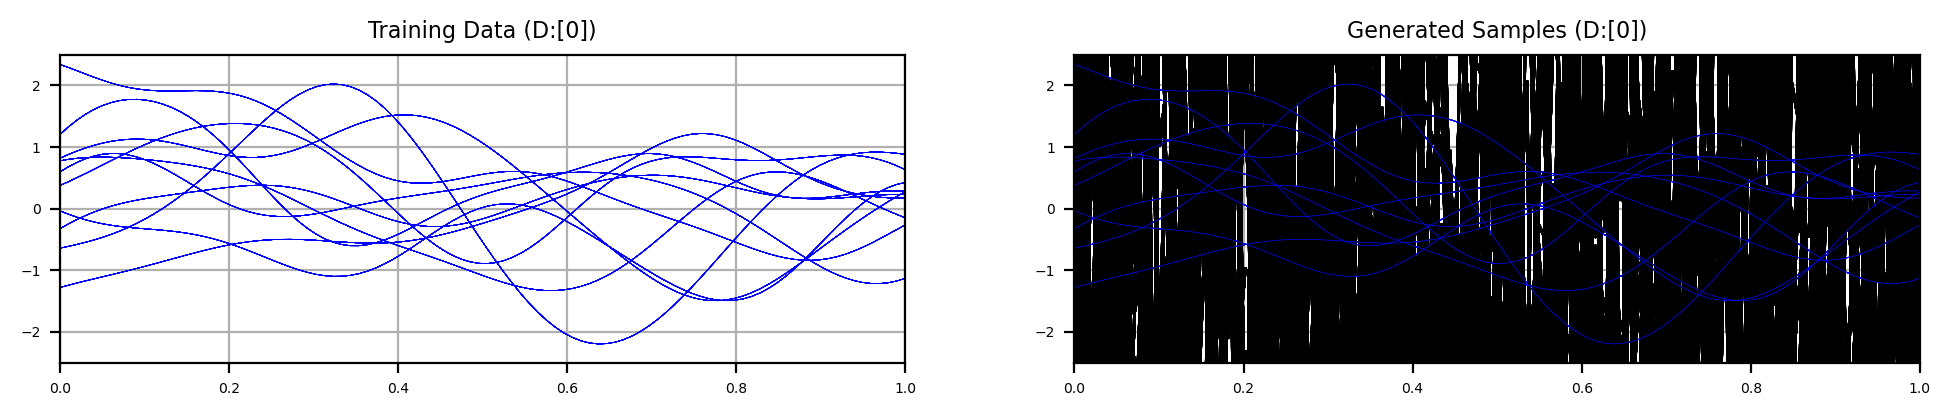

[2500/50000][5.00%] loss:[0.471]
  [l1]:[0.287]
  [l2]:[0.185]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[5000/50000][10.00%] loss:[0.440]
  [l1]:[0.271]
  [l2]:[0.169]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


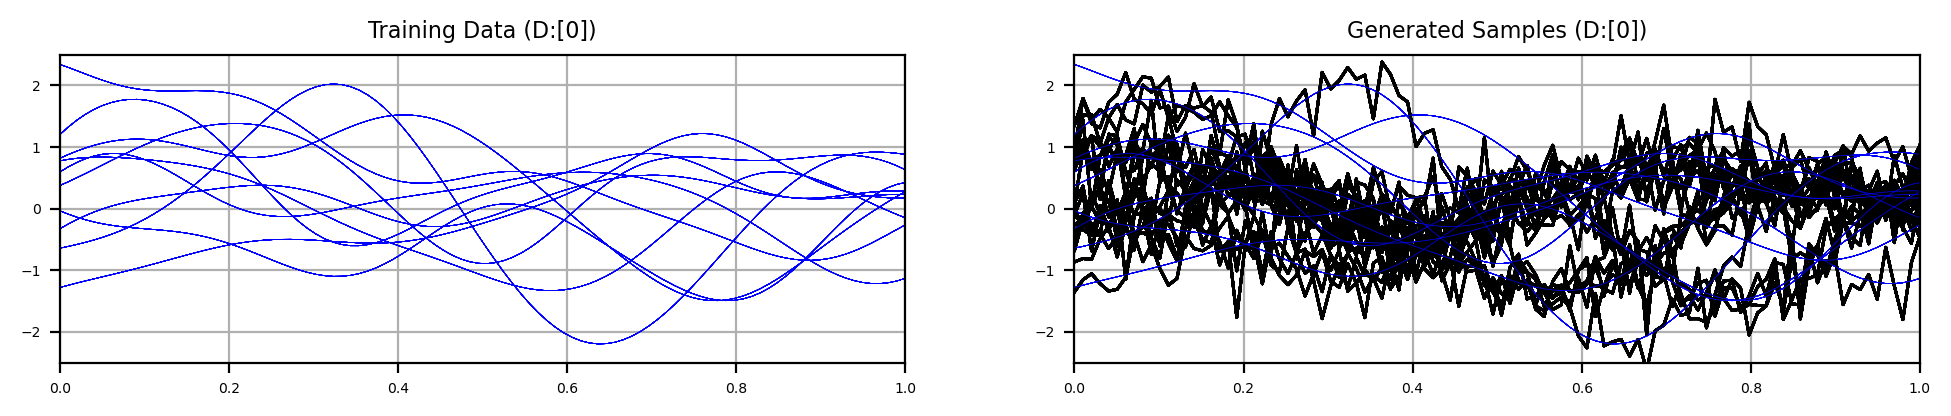

[7500/50000][15.00%] loss:[0.480]
  [l1]:[0.293]
  [l2]:[0.186]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[10000/50000][20.00%] loss:[0.486]
  [l1]:[0.294]
  [l2]:[0.192]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


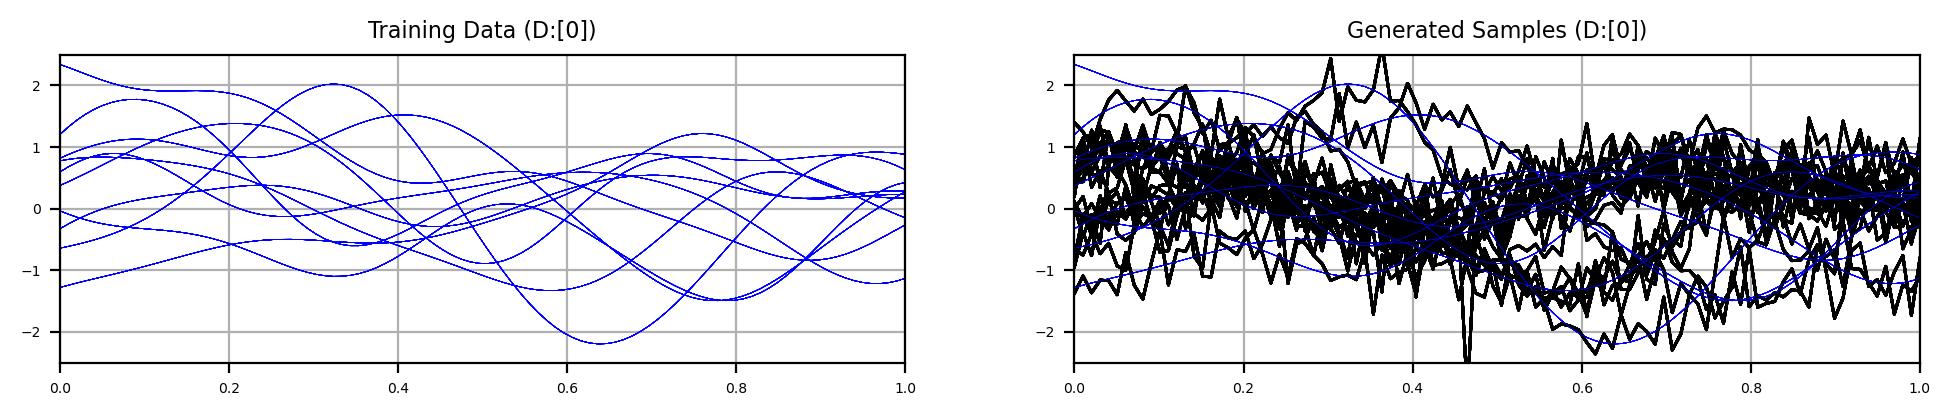

[12500/50000][25.00%] loss:[0.427]
  [l1]:[0.266]
  [l2]:[0.161]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[15000/50000][30.00%] loss:[0.470]
  [l1]:[0.282]
  [l2]:[0.188]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


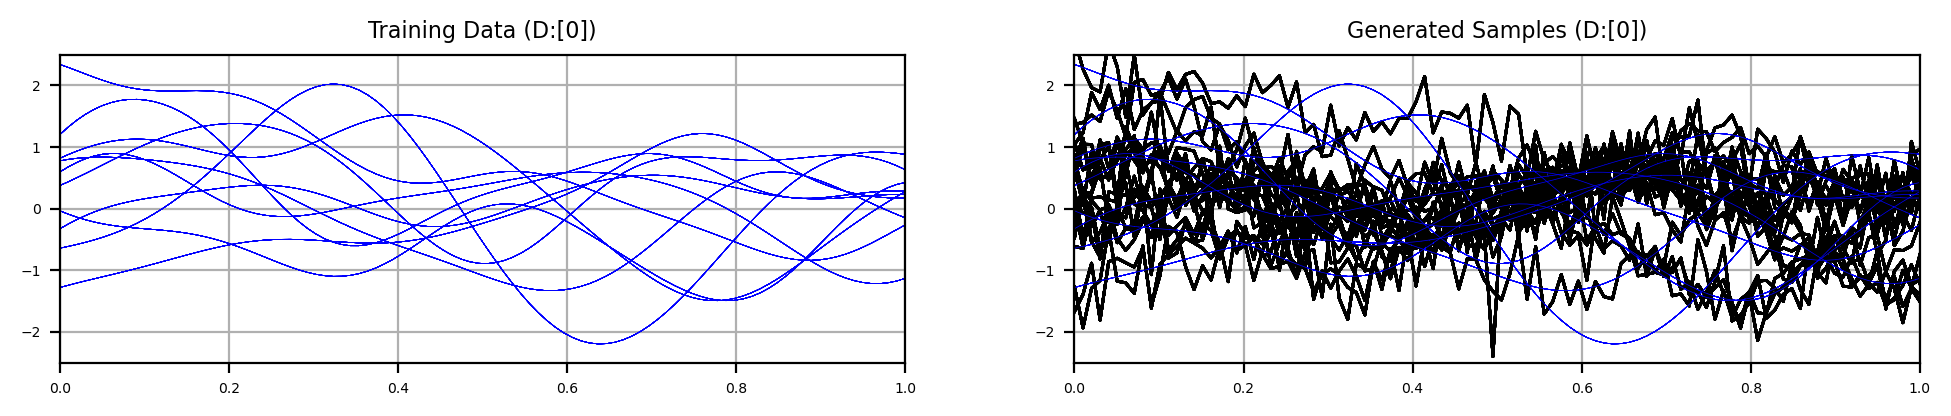

[17500/50000][35.00%] loss:[0.417]
  [l1]:[0.257]
  [l2]:[0.160]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[20000/50000][40.00%] loss:[0.531]
  [l1]:[0.316]
  [l2]:[0.215]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


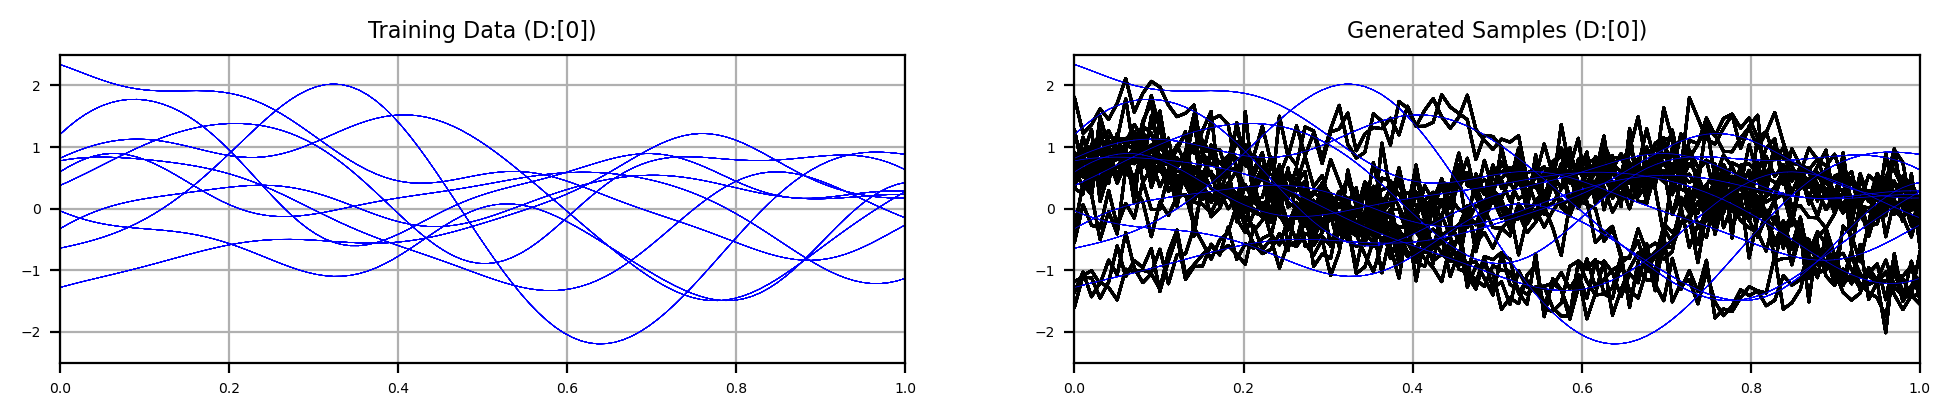

[22500/50000][45.00%] loss:[0.468]
  [l1]:[0.284]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[25000/50000][50.00%] loss:[0.417]
  [l1]:[0.264]
  [l2]:[0.153]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


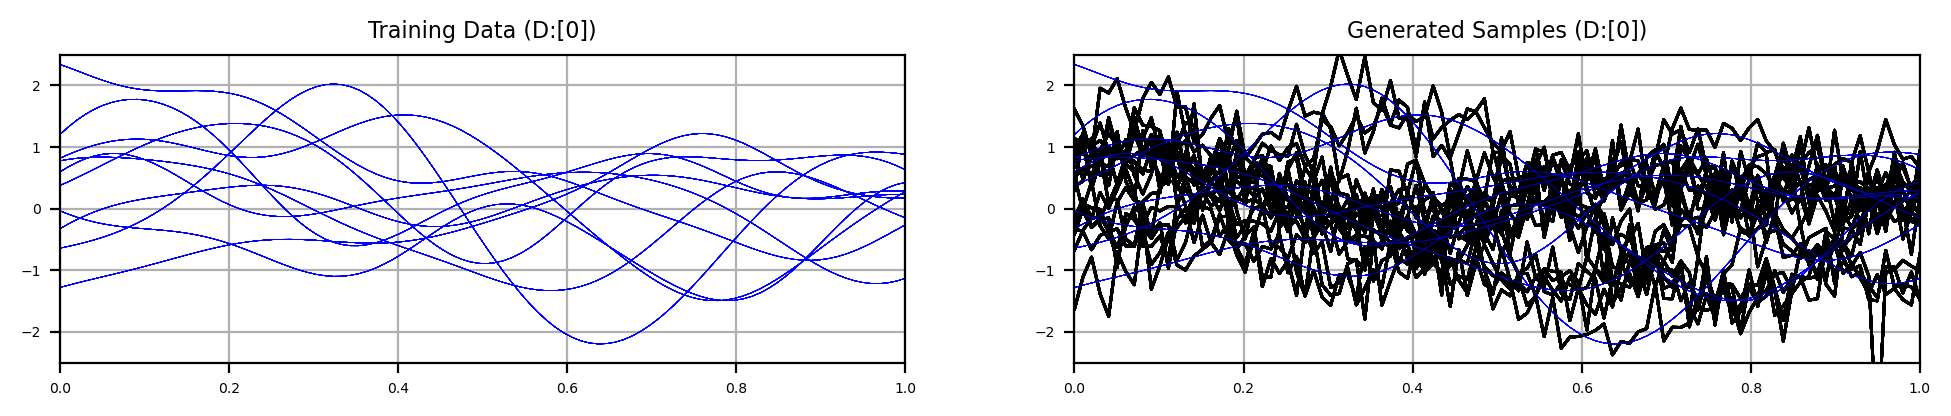

[27500/50000][55.00%] loss:[0.401]
  [l1]:[0.258]
  [l2]:[0.142]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[30000/50000][60.00%] loss:[0.433]
  [l1]:[0.268]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


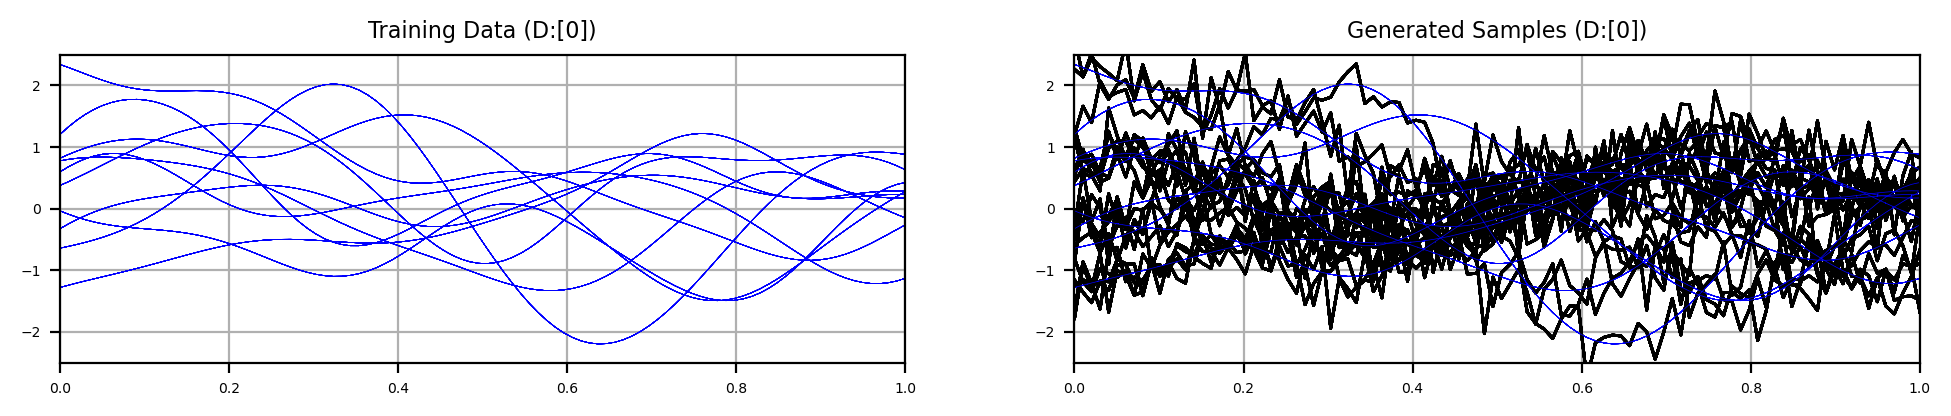

[32500/50000][65.00%] loss:[0.492]
  [l1]:[0.297]
  [l2]:[0.195]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[35000/50000][70.00%] loss:[0.477]
  [l1]:[0.286]
  [l2]:[0.190]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


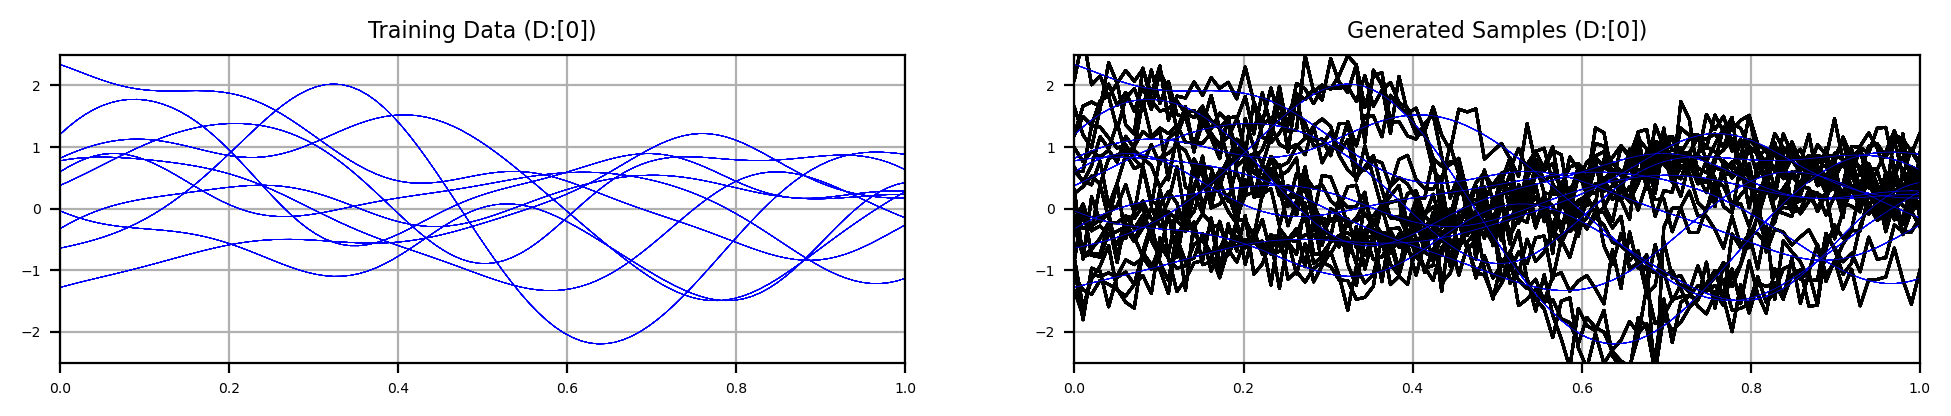

[37500/50000][75.00%] loss:[0.406]
  [l1]:[0.254]
  [l2]:[0.152]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[40000/50000][80.00%] loss:[0.438]
  [l1]:[0.270]
  [l2]:[0.168]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


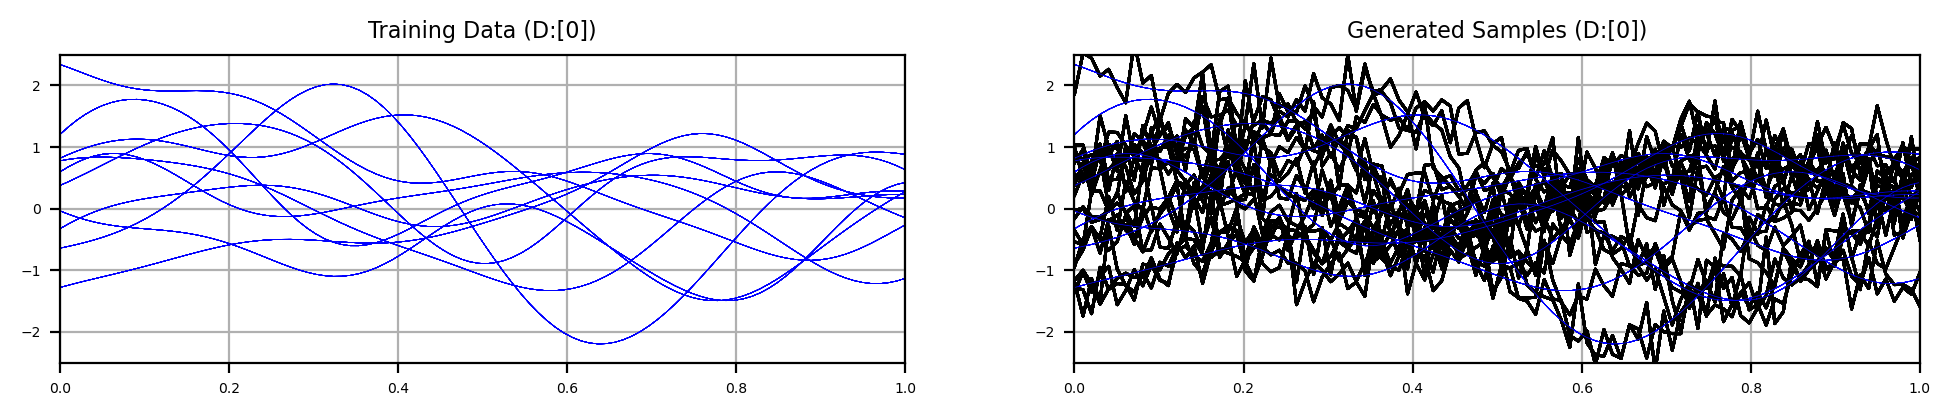

[42500/50000][85.00%] loss:[0.458]
  [l1]:[0.276]
  [l2]:[0.182]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[45000/50000][90.00%] loss:[0.473]
  [l1]:[0.289]
  [l2]:[0.184]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


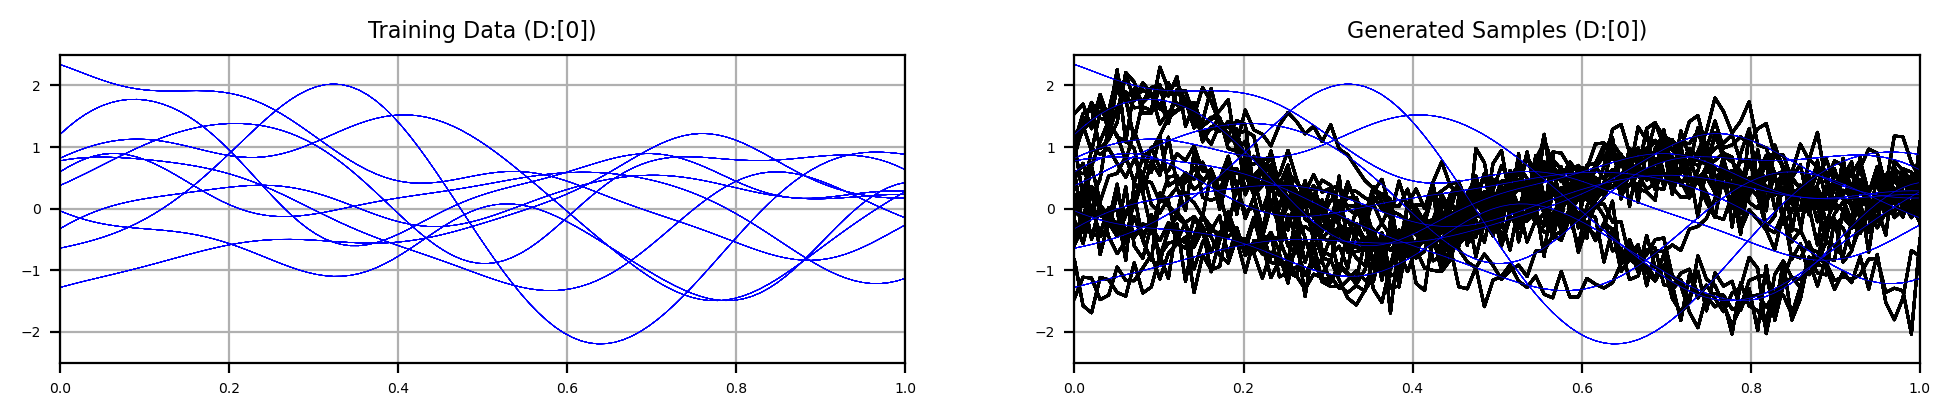

[47500/50000][95.00%] loss:[0.430]
  [l1]:[0.266]
  [l2]:[0.164]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]
[49999/50000][100.00%] loss:[0.436]
  [l1]:[0.271]
  [l2]:[0.165]
  [huber]:[0.000]
  [smt_l1]:[0.000]
  [vel]:[0.000]
  [acc]:[0.000]


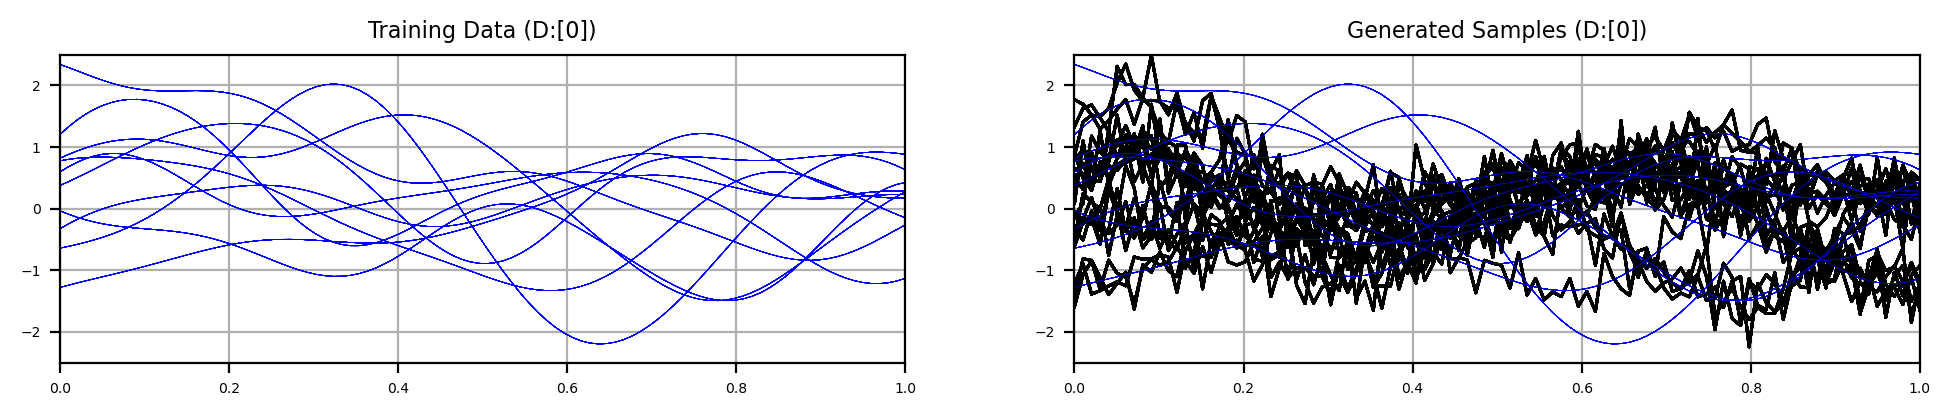

Done.


In [6]:
ddpm_train_wrapper(
    times,x_0,dc,actv=actv,
    hyp_len_forward=0.0,hyp_len_projection=0.0,hyp_sig2w=1e-6,
    n_sample=20,base_lr=base_lr,MAX_ITER=MAX_ITER,BATCH_SIZE=BATCH_SIZE,
    l1_w=l1_w,l2_w=l2_w,huber_w=huber_w,smt_l1_w=smt_l1_w,
    A=A,V=V,vel_w=0.0,acc_w=0.0,
    RKHS_PROJECTION_EACH_X_T=False,device='cpu')
print ("Done.")